In [7]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import tifffile
import numpy as np
import random

def generate_mask(image_shape, num_squares, square_size, mask_color=0):
    mask = np.ones(image_shape, dtype=np.uint8) * 255
    for _ in range(num_squares):
        x = np.random.randint(0, image_shape[1] - square_size - 1)
        y = np.random.randint(0, image_shape[0] - square_size - 1)
        mask[y:y+square_size, x:x+square_size] = mask_color

    return mask

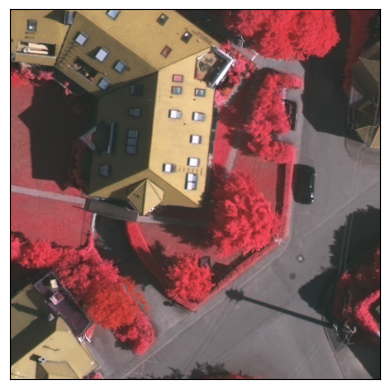

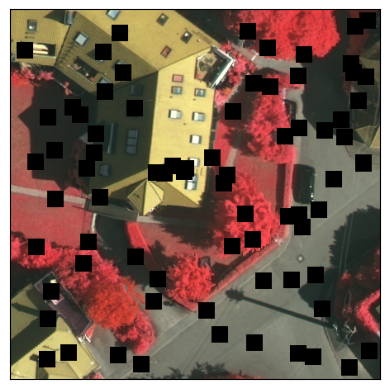

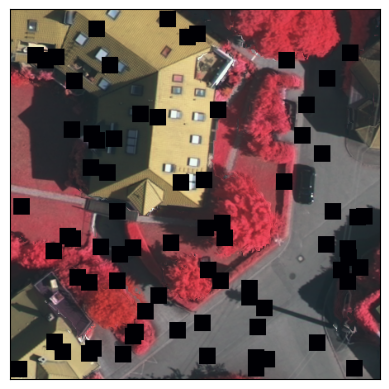

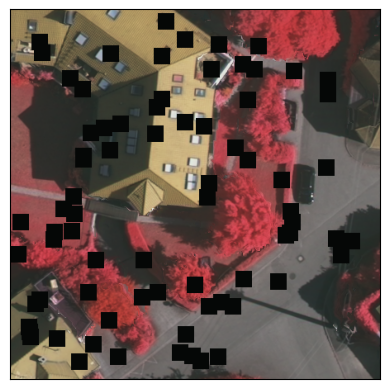

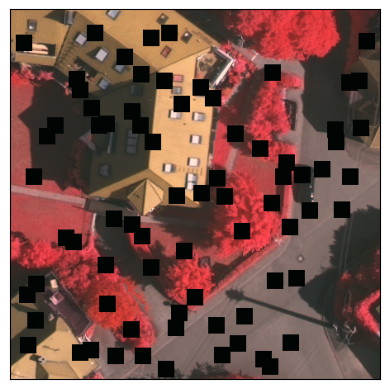

In [8]:
# read input image
x, y = 500, 1000
img = tifffile.imread('../../datasets/Vaihingen/Vaihingen_tiff/img/top_mosaic_09cm_area1.tif')[x:x+448, y:y+448, :]


# define a transform to perform transformations
transform = T.Compose([T.ToTensor(), T.Grayscale(), T.ColorJitter(contrast=0.5, brightness=0.5, saturation=0, hue=0), T.ToPILImage()])
# transform = T.Compose([T.ToTensor(), T.RandomErasing(p=0.5, scale=(0.4, 0.4), ratio=(0.8, 0.8), value=0, inplace=False), T.ToPILImage()])
GaussianBlur = T.GaussianBlur(5, sigma=(0.1, 2.0))
def fun(img):
    mask = generate_mask(img.shape, 75, 20, 0)
    img1 = img.copy()
    img1[np.where(mask == 0)] = 0
    img1 = T.ToTensor()(img1)
    for i in range(img1.shape[0]):
        img1[i] = T.ColorJitter(contrast=0.1, brightness=0.1,)(img1[i].unsqueeze(dim=0)).squeeze()
        # if random.randint(0,1) : img1[i] = GaussianBlur(img1[i].unsqueeze(dim=0)).squeeze()
    img1 = T.ToPILImage()(img1)
    return img1

# use dictionary comprehension to take four output images
# imgs = [fun(img) for _ in range(4)]

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

for i in range(4):
    plt.imshow(fun(img), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

